In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image as kimage

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


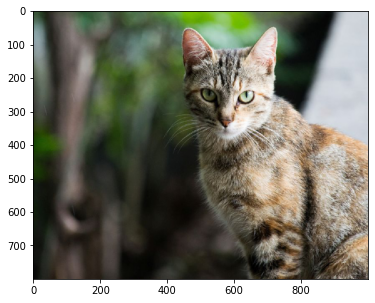

In [63]:
PATH = '/content/gdrive/My Drive/data/template-matching/'

height = 800
width  = 1000

# load an image
image = kimage.load_img(PATH+'image2.jpg', target_size=(height, width))

# show the image
plt.figure(figsize=(6,6))
plt.imshow(image)

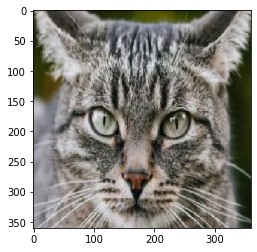

In [64]:
# show results
import matplotlib
import matplotlib.pyplot as plt

# create a template
side = 360
template = kimage.load_img(PATH+'template_cat1.jpg', target_size=(side, side))

# show the template
plt.figure(figsize=(4,4))
plt.imshow(template)

In [65]:
# normalize
image    = kimage.img_to_array(image)/255.0
template = kimage.img_to_array(template)/255.0

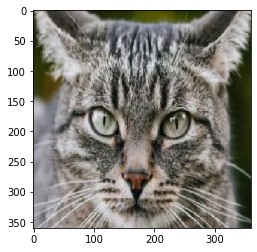

In [66]:
# change template
#template = template - 90.0/255.0
#template = np.clip(template, 0.0, 1.0)

plt.figure(figsize=(4,4))
plt.imshow(template)

In [67]:
distances = []
for i in range(height-side+1):
  for j in range(width-side+1):
    patch = image[i:i+side,j:j+side,:]
    dis = np.sum(np.absolute(template - patch))
    distances.append((dis, i, j))

print(len(distances))
print(distances[0][0])

282681
91925.28


In [68]:
def getKey(item):
    return item[0]

distances_sorted = sorted(distances, key=getKey, reverse=False)
print(distances_sorted[:3])

[(82833.16, 0, 70), (82837.88, 0, 69), (82838.61, 0, 71)]


<Figure size 1152x1152 with 0 Axes>

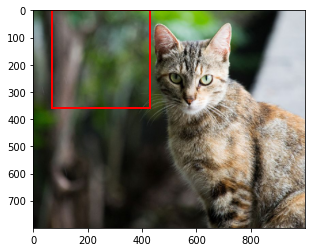

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = kimage.load_img(PATH+'image2.jpg', target_size=(800, 1000))

plt.figure(figsize=(16,16))
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
for i in range(1): 
  rect = patches.Rectangle((distances_sorted[i][2], distances_sorted[i][1]), 
                           side, side, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

plt.show()